# Load dataset

In [1]:
import pandas as pd
import os

In [2]:
data_frames = []
for file_name in os.listdir('./data/'):
    if 'transactions' in file_name:
        data_frames.append(
            pd.read_csv(os.path.join('./data/', file_name),
                        parse_dates=['creation_date']
                       ))

In [3]:
data = pd.concat(data_frames)

In [4]:
wh_bl_list = pd.read_csv('./data/lists201610201705.csv')

## Join datasets

In [5]:
data = data.merge(wh_bl_list, how='left', on=['uuid', 'uuid'])

In [6]:
data['status'] = data.status.astype('category')

In [7]:
status_values = sorted(data.status.unique().tolist())

# Exploratory data analysis

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

## Amount analysis

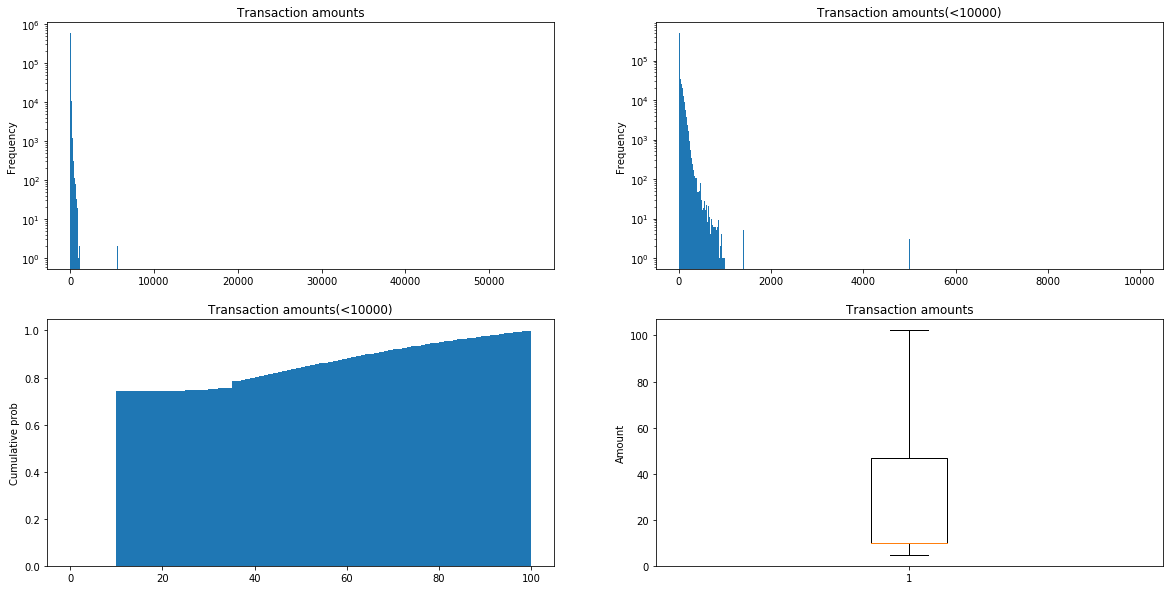

In [9]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
plt.hist(data.amount, bins=1000, log=True)
plt.title('Transaction amounts')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(data.amount, bins=1000, log=True, range=(0, 10000))
plt.title('Transaction amounts(<10000)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(data.amount, bins=1000, normed=1, range=(0, 100), cumulative=True)
plt.title('Transaction amounts(<10000)')
plt.ylabel('Cumulative prob')

plt.subplot(2, 2, 4)
plt.boxplot(data.amount, showfliers=False)
plt.title('Transaction amounts')
plt.ylabel('Amount')

plt.show()

In [10]:
print "Mean: ", data.amount.mean()
print "Median: ", data.amount.median()
print "Std", data.amount.std()
print "Skew: ", data.amount.skew()
print "kurtosis: ", data.amount.kurtosis()

Mean:  35.3441036804
Median:  10.0
Std 83.4839311252
Skew:  399.113435632
kurtosis:  260614.222373


## Whitelist analysis

In [11]:
pd.concat(
    [pd.crosstab(index=data.whitelist, columns='count'),
    pd.crosstab(index=data.whitelist, columns='count', normalize=True)],
    axis=1
)

col_0,count,count
whitelist,,
False,692175,0.959399
True,29292,0.040601


## Chargeback analysis

In [12]:
pd.concat(
    [pd.crosstab(index=data.chargeback, columns='count'),
    pd.crosstab(index=data.chargeback, columns='count', normalize=True)],
    axis=1
)

col_0,count,count
chargeback,,
False,715970,0.992381
True,5497,0.007619


## Blacklist analysis

In [13]:
pd.concat(
    [pd.crosstab(index=data.blacklist, columns='count'),
    pd.crosstab(index=data.blacklist, columns='count', normalize=True)],
    axis=1
)

col_0,count,count
blacklist,,
False,712643,0.987769
True,8824,0.012231


## Status analysis

In [14]:
pd.concat(
    [pd.crosstab(index=data.status, columns='count'),
    pd.crosstab(index=data.status, columns='count', normalize=True)],
    axis=1
)

col_0,count,count
status,,
3,2454,0.003401
4,114016,0.158034
5,2,0.000003
6,110075,0.152571
8,472923,0.655502
11,10291,0.014264
12,11660,0.016162
13,27,0.000037
14,19,0.000026


## Whitelist and chargeback analysis

In [15]:
pd.concat(
    [pd.crosstab(data.whitelist, [data.chargeback]),
    pd.crosstab(data.whitelist, [data.chargeback], normalize='all')],
    axis=1
)

chargeback,False,True,False,True
whitelist,,,,
False,686794,5381,0.951941,0.007458
True,29176,116,0.040440,0.000161


## Whitelist and blacklist analysis

In [16]:
pd.concat(
    [pd.crosstab(data.whitelist, [data.blacklist]),
    pd.crosstab(data.whitelist, [data.blacklist], normalize='all')],
    axis=1
)

blacklist,False,True,False,True
whitelist,,,,
False,683738,8437,0.947705,0.011694
True,28905,387,0.040064,0.000536


## Whitelist and status analysis

In [17]:
pd.concat(
    [pd.crosstab(data.whitelist, [data.status]),
    pd.crosstab(data.whitelist, [data.status], normalize='all')]
)

status,3,4,5,6,8,11,12,13,14
whitelist,,,,,,,,,
False,2326.000000,113639.000000,2.000000,107396.000000,446985.000000,10154.000000,11627.000000,27.000000,19.000000
True,128.000000,377.000000,0.000000,2679.000000,25938.000000,137.000000,33.000000,0.000000,0.000000
False,0.003224,0.157511,0.000003,0.148858,0.619550,0.014074,0.016116,0.000037,0.000026
True,0.000177,0.000523,0.000000,0.003713,0.035952,0.000190,0.000046,0.000000,0.000000


## Chargeback and blacklist analysis

In [18]:
pd.concat(
    [pd.crosstab(data.chargeback, [data.blacklist]),
    pd.crosstab(data.chargeback, [data.blacklist], normalize='all')],
    axis=1
)

blacklist,False,True,False,True
chargeback,,,,
False,707146,8824,0.980150,0.012231
True,5497,0,0.007619,0.000000


## Chargeback and status analysis

In [19]:
pd.concat(
    [pd.crosstab(data.chargeback, [data.status]),
    pd.crosstab(data.chargeback, [data.status], normalize='all')]
)

status,3,4,5,6,8,11,12,13,14
chargeback,,,,,,,,,
False,2454.000000,114016.000000,2.000000,110075.000000,472923.000000,4794.000000,11660.000000,27.000000,19.000000
True,0.000000,0.000000,0.000000,0.000000,0.000000,5497.000000,0.000000,0.000000,0.000000
False,0.003401,0.158034,0.000003,0.152571,0.655502,0.006645,0.016162,0.000037,0.000026
True,0.000000,0.000000,0.000000,0.000000,0.000000,0.007619,0.000000,0.000000,0.000000


## Blacklist and status analysis

In [20]:
pd.concat(
    [pd.crosstab(data.blacklist, [data.status]),
    pd.crosstab(data.blacklist, [data.status], normalize='all')]
)

status,3,4,5,6,8,11,12,13,14
blacklist,,,,,,,,,
False,2454.000000,107621.000000,2.000000,110073.000000,472869.000000,10288.000000,9290.000000,27.000000,19.000000
True,0.000000,6395.000000,0.000000,2.000000,54.000000,3.000000,2370.000000,0.000000,0.000000
False,0.003401,0.149170,0.000003,0.152568,0.655427,0.014260,0.012877,0.000037,0.000026
True,0.000000,0.008864,0.000000,0.000003,0.000075,0.000004,0.003285,0.000000,0.000000


## Amount and categorical variable analysis 

/home/ubuntu/miniconda2/envs/PayUTest/lib/python2.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


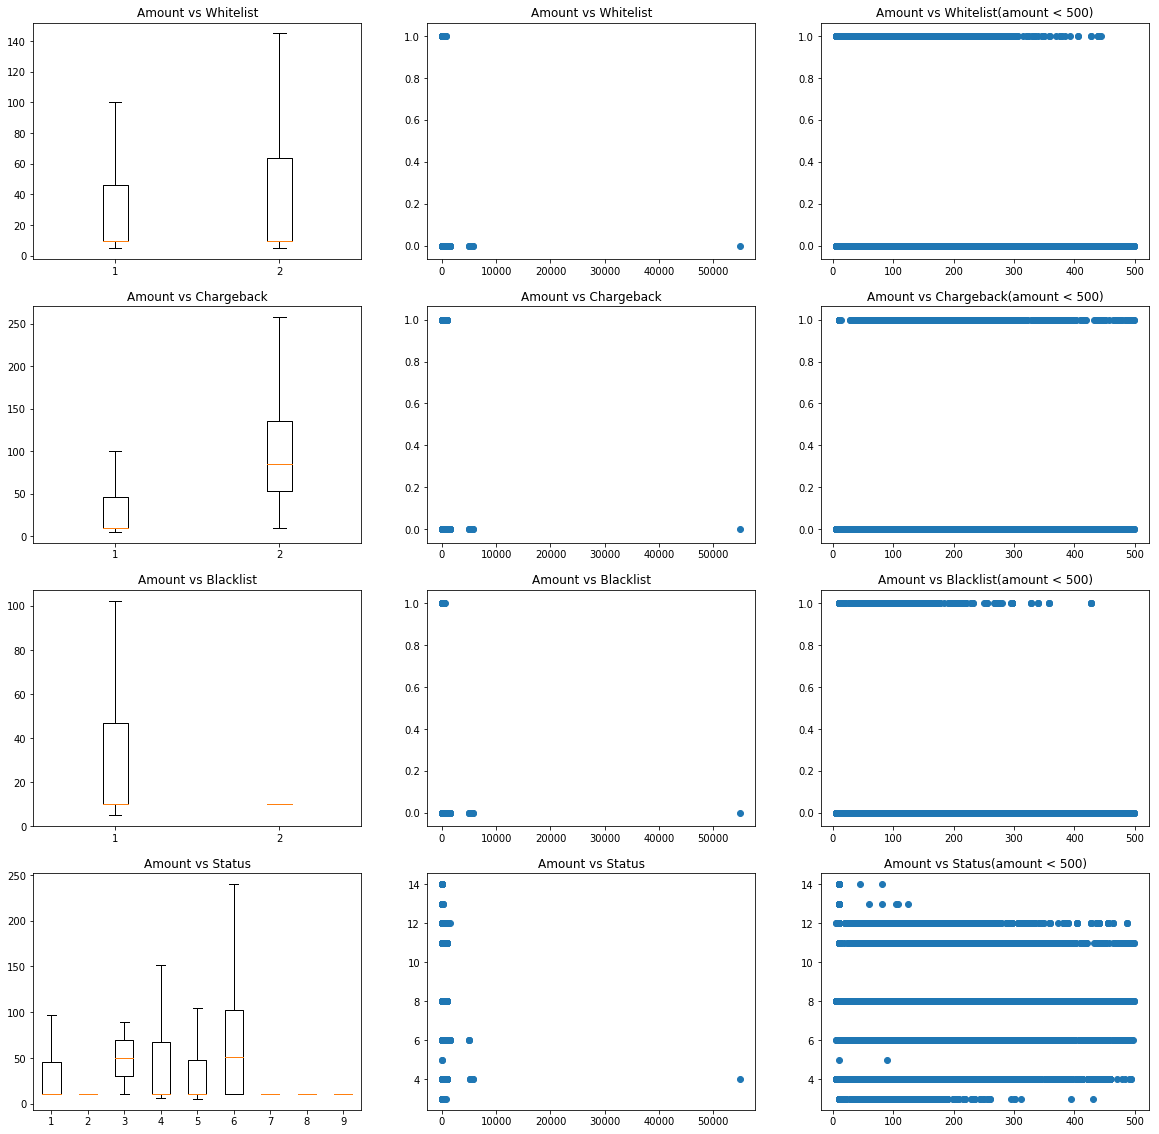

In [21]:
plt.figure(figsize=(20,20))

plt.subplot(4, 3, 1)
plt.boxplot([data.amount[~data.whitelist], data.amount[data.whitelist]], showfliers=False)
plt.title('Amount vs Whitelist')
plt.subplot(4, 3, 2)
plt.scatter(data.amount, data.whitelist)
plt.title('Amount vs Whitelist')
plt.subplot(4, 3, 3)
plt.scatter(data.amount[data.amount < 500], data.whitelist[data.amount < 500])
plt.title('Amount vs Whitelist(amount < 500)')

plt.subplot(4, 3, 4)
plt.boxplot([data.amount[~data.chargeback], data.amount[data.chargeback]], showfliers=False)
plt.title('Amount vs Chargeback')
plt.subplot(4, 3, 5)
plt.scatter(data.amount, data.chargeback)
plt.title('Amount vs Chargeback')
plt.subplot(4, 3, 6)
plt.scatter(data.amount[data.amount < 500], data.chargeback[data.amount < 500])
plt.title('Amount vs Chargeback(amount < 500)')

plt.subplot(4, 3, 7)
plt.boxplot([data.amount[~data.blacklist], data.amount[data.blacklist]], showfliers=False)
plt.title('Amount vs Blacklist')
plt.subplot(4, 3, 8)
plt.scatter(data.amount, data.blacklist)
plt.title('Amount vs Blacklist')
plt.subplot(4, 3, 9)
plt.scatter(data.amount[data.amount < 500], data.blacklist[data.amount < 500])
plt.title('Amount vs Blacklist(amount < 500)')

plt.subplot(4, 3, 10)
plt.boxplot([data.amount[data.status == i] for i in status_values], showfliers=False)
plt.title('Amount vs Status')
plt.subplot(4, 3, 11)
plt.scatter(data.amount, data.status)
plt.title('Amount vs Status')
plt.subplot(4, 3, 12)
plt.scatter(data.amount[data.amount < 500], data.status[data.amount < 500])
plt.title('Amount vs Status(amount < 500)')

plt.show()

# Data preparation

In [22]:
data['label'] = data.status.isin([11, 12]) | data.chargeback | data.blacklist

In [23]:
new_fraudulent_emails_or_cards = True
fraudulent_emails = set()
fraudulent_cards = set()
while new_fraudulent_emails_or_cards:
    fraudulent_transactions = data[data.label]
    new_fraudulent_emails = set(fraudulent_transactions.email.unique())
    new_fraudulent_cards = set(fraudulent_transactions.card.unique())
    if len(new_fraudulent_emails - fraudulent_emails) or len(new_fraudulent_cards - fraudulent_cards):
        fraudulent_emails = new_fraudulent_emails
        fraudulent_cards = new_fraudulent_cards
        data['label'] = data.label | data.email.isin(fraudulent_emails) | data.card.isin(fraudulent_cards)
    else:
        new_fraudulent_emails_or_cards = False

In [24]:
data['label'] = data.label.map(lambda x: 1 if x else 0)

In [25]:
data['label'] = data.label + ((data.status == 8) & (data.label == 0)).map(lambda x: 2 if x else 0)

In [26]:
data = data[data.label > 0]

In [27]:
data['label'] = data.label.map(lambda x: 1 if x == 1 else 0)

# Feature engineering

## MXN to Dollar

In [28]:
data['amount'] = data['amount'].map(lambda x: x * 0.052)

## Email length

In [29]:
data['email_length'] = data['email'].map(lambda x: len(x))

## Num digits in email

In [30]:
data['num_digits_email'] = data['email'].map(lambda x: len([c for c in x if c.isdigit()]))

## Email provider

In [31]:
data['email_provider'] = data['email'].map(lambda x: x[x.find('@') + 1:])

In [32]:
print data['email_provider'].unique().shape

(1574,)


## Num symbols in email

In [33]:
data['num_symbols_email'] = data['email'].map(lambda x: len([c for c in x if not c.isalnum()]))

## Num email usage

In [34]:
data = data.sort_values(by=['creation_date'])

In [35]:
data['num_email_usage'] = data.groupby('email').cumcount()

## Num card usage

In [36]:
data = data.sort_values(by=['creation_date'])

In [37]:
data['num_card_usage'] = data.groupby('card').cumcount()

## Transaction hour
Assuming transactions where done in similar locations.

In [38]:
data['transaction_hour'] = data.creation_date.map(lambda x : x.hour)

## Transaction week day

In [39]:
data['transaction_weekday'] = data.creation_date.map(lambda x : x.weekday())

## Feature selection

In [40]:
data.dtypes

uuid                            int64
creation_date          datetime64[ns]
email                          object
card                           object
status                       category
chargeback                       bool
amount                        float64
eval_uuid                       int64
blacklist                        bool
whitelist                        bool
label                           int64
email_length                    int64
num_digits_email                int64
email_provider                 object
num_symbols_email               int64
num_email_usage                 int64
num_card_usage                  int64
transaction_hour                int64
transaction_weekday             int64
dtype: object

In [41]:
labels = data.label.copy()
data = data.drop('label', axis=1)
data = data.drop('uuid', axis=1)
data = data.drop('creation_date', axis=1)
data = data.drop('email', axis=1)
data = data.drop('card', axis=1)
data = data.drop('eval_uuid', axis=1)
data = data.drop('email_provider', axis=1)

In [42]:
data = pd.get_dummies(data, columns=['status'])

In [43]:
data['chargeback'] = data.chargeback.astype('uint8')
data['blacklist'] = data.blacklist.astype('uint8')
data['whitelist'] = data.whitelist.astype('uint8')

In [44]:
data.dtypes

chargeback               uint8
amount                 float64
blacklist                uint8
whitelist                uint8
email_length             int64
num_digits_email         int64
num_symbols_email        int64
num_email_usage          int64
num_card_usage           int64
transaction_hour         int64
transaction_weekday      int64
status_3                 uint8
status_4                 uint8
status_5                 uint8
status_6                 uint8
status_8                 uint8
status_11                uint8
status_12                uint8
status_13                uint8
status_14                uint8
dtype: object

# Model training

## Split dataset

In [45]:
print data.shape[0], labels.sum(), data.shape[0] - labels.sum()
print 1, (labels.sum() + 0.0) / data.shape[0], (data.shape[0] - labels.sum() + 0.0) / data.shape[0]

509039 62846 446193
1 0.12346008852 0.87653991148


In [46]:
from sklearn.model_selection import StratifiedShuffleSplit

In [47]:
cv = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
train_idx, test_idx = cv.split(data, labels).next()

In [48]:
import numpy as np

X_train = data.iloc[train_idx].as_matrix()
y_train = np.array(labels.iloc[train_idx].tolist())
X_test = data.iloc[test_idx].as_matrix()
y_test = np.array(labels.iloc[test_idx].tolist())

In [49]:
print (y_train.sum() + 0.0) / len(y_train), (y_test.sum() + 0.0) / len(y_test)

0.123460640275 0.123457881502


## Decision tree classifier 

### Build model

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [51]:
model = DecisionTreeClassifier()

## Train model

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [53]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
param_grid = dict(max_depth=[4, 8, 16, None], min_samples_split=[10, 100])
grid = GridSearchCV(model, param_grid=param_grid, n_jobs = 2, cv=cv, scoring='f1')

In [54]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'min_samples_split': [10, 100], 'max_depth': [4, 8, 16, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [55]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
grid.best_score_

0.7481958741594571

In [57]:
dtc_model = grid.best_estimator_

## Model evaluation

In [58]:
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, precision_score, recall_score, roc_curve

In [59]:
predictions = dtc_model.predict_proba(X_test)[:, 1]

In [60]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

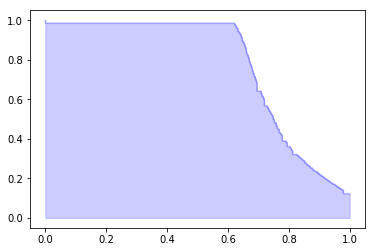

In [61]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label=1)

Text(0.5,1,u'ROC')

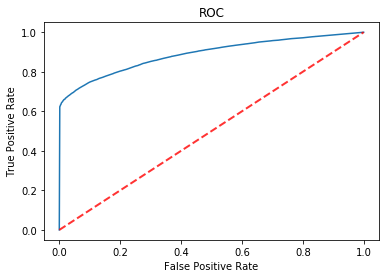

In [63]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [64]:
predictions = dtc_model.predict(X_test)

In [65]:
tn, fp, fn, tp = confusion_matrix(predictions, y_test).ravel()

In [66]:
print tp, fp
print fn, tn

7945 4624
356 88883


In [67]:
print precision_score(predictions, y_test), recall_score(predictions, y_test), f1_score(predictions, y_test)

0.632110748667 0.957113600771 0.761379971251


## SVM

### Build model

In [68]:
from sklearn.svm import LinearSVC

In [69]:
normalizer = StandardScaler()
svm = LinearSVC(dual=False)
model = Pipeline([('normalizer', normalizer), ('svm', svm)])

In [70]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
param_grid = dict(svm__C=[.0001, .001, .01, .1, 1])
grid = GridSearchCV(model, param_grid=param_grid, n_jobs = 2, cv=cv, scoring='f1')

In [71]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'svm__C': [0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [72]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', LinearSVC(C=0.001, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [73]:
grid.best_score_

0.7284928275142909

In [74]:
svm_model = grid.best_estimator_

## Model evaluation

In [75]:
predictions = svm_model.decision_function(X_test)

In [76]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

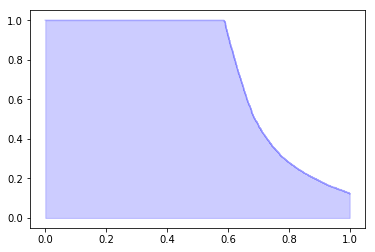

In [77]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label=1)

Text(0.5,1,u'ROC')

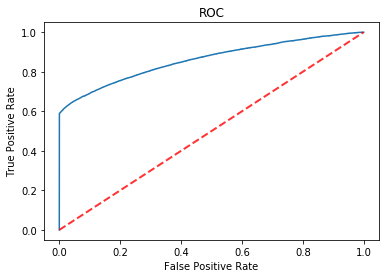

In [79]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [80]:
predictions = svm_model.predict(X_test)

In [81]:
tn, fp, fn, tp = confusion_matrix(predictions, y_test).ravel()

In [82]:
print tp, fp
print fn, tn

7364 5205
0 89239


In [83]:
print precision_score(predictions, y_test), recall_score(predictions, y_test), f1_score(predictions, y_test)

0.585885909778 1.0 0.738875232027


# Results analysis

## Important features dct

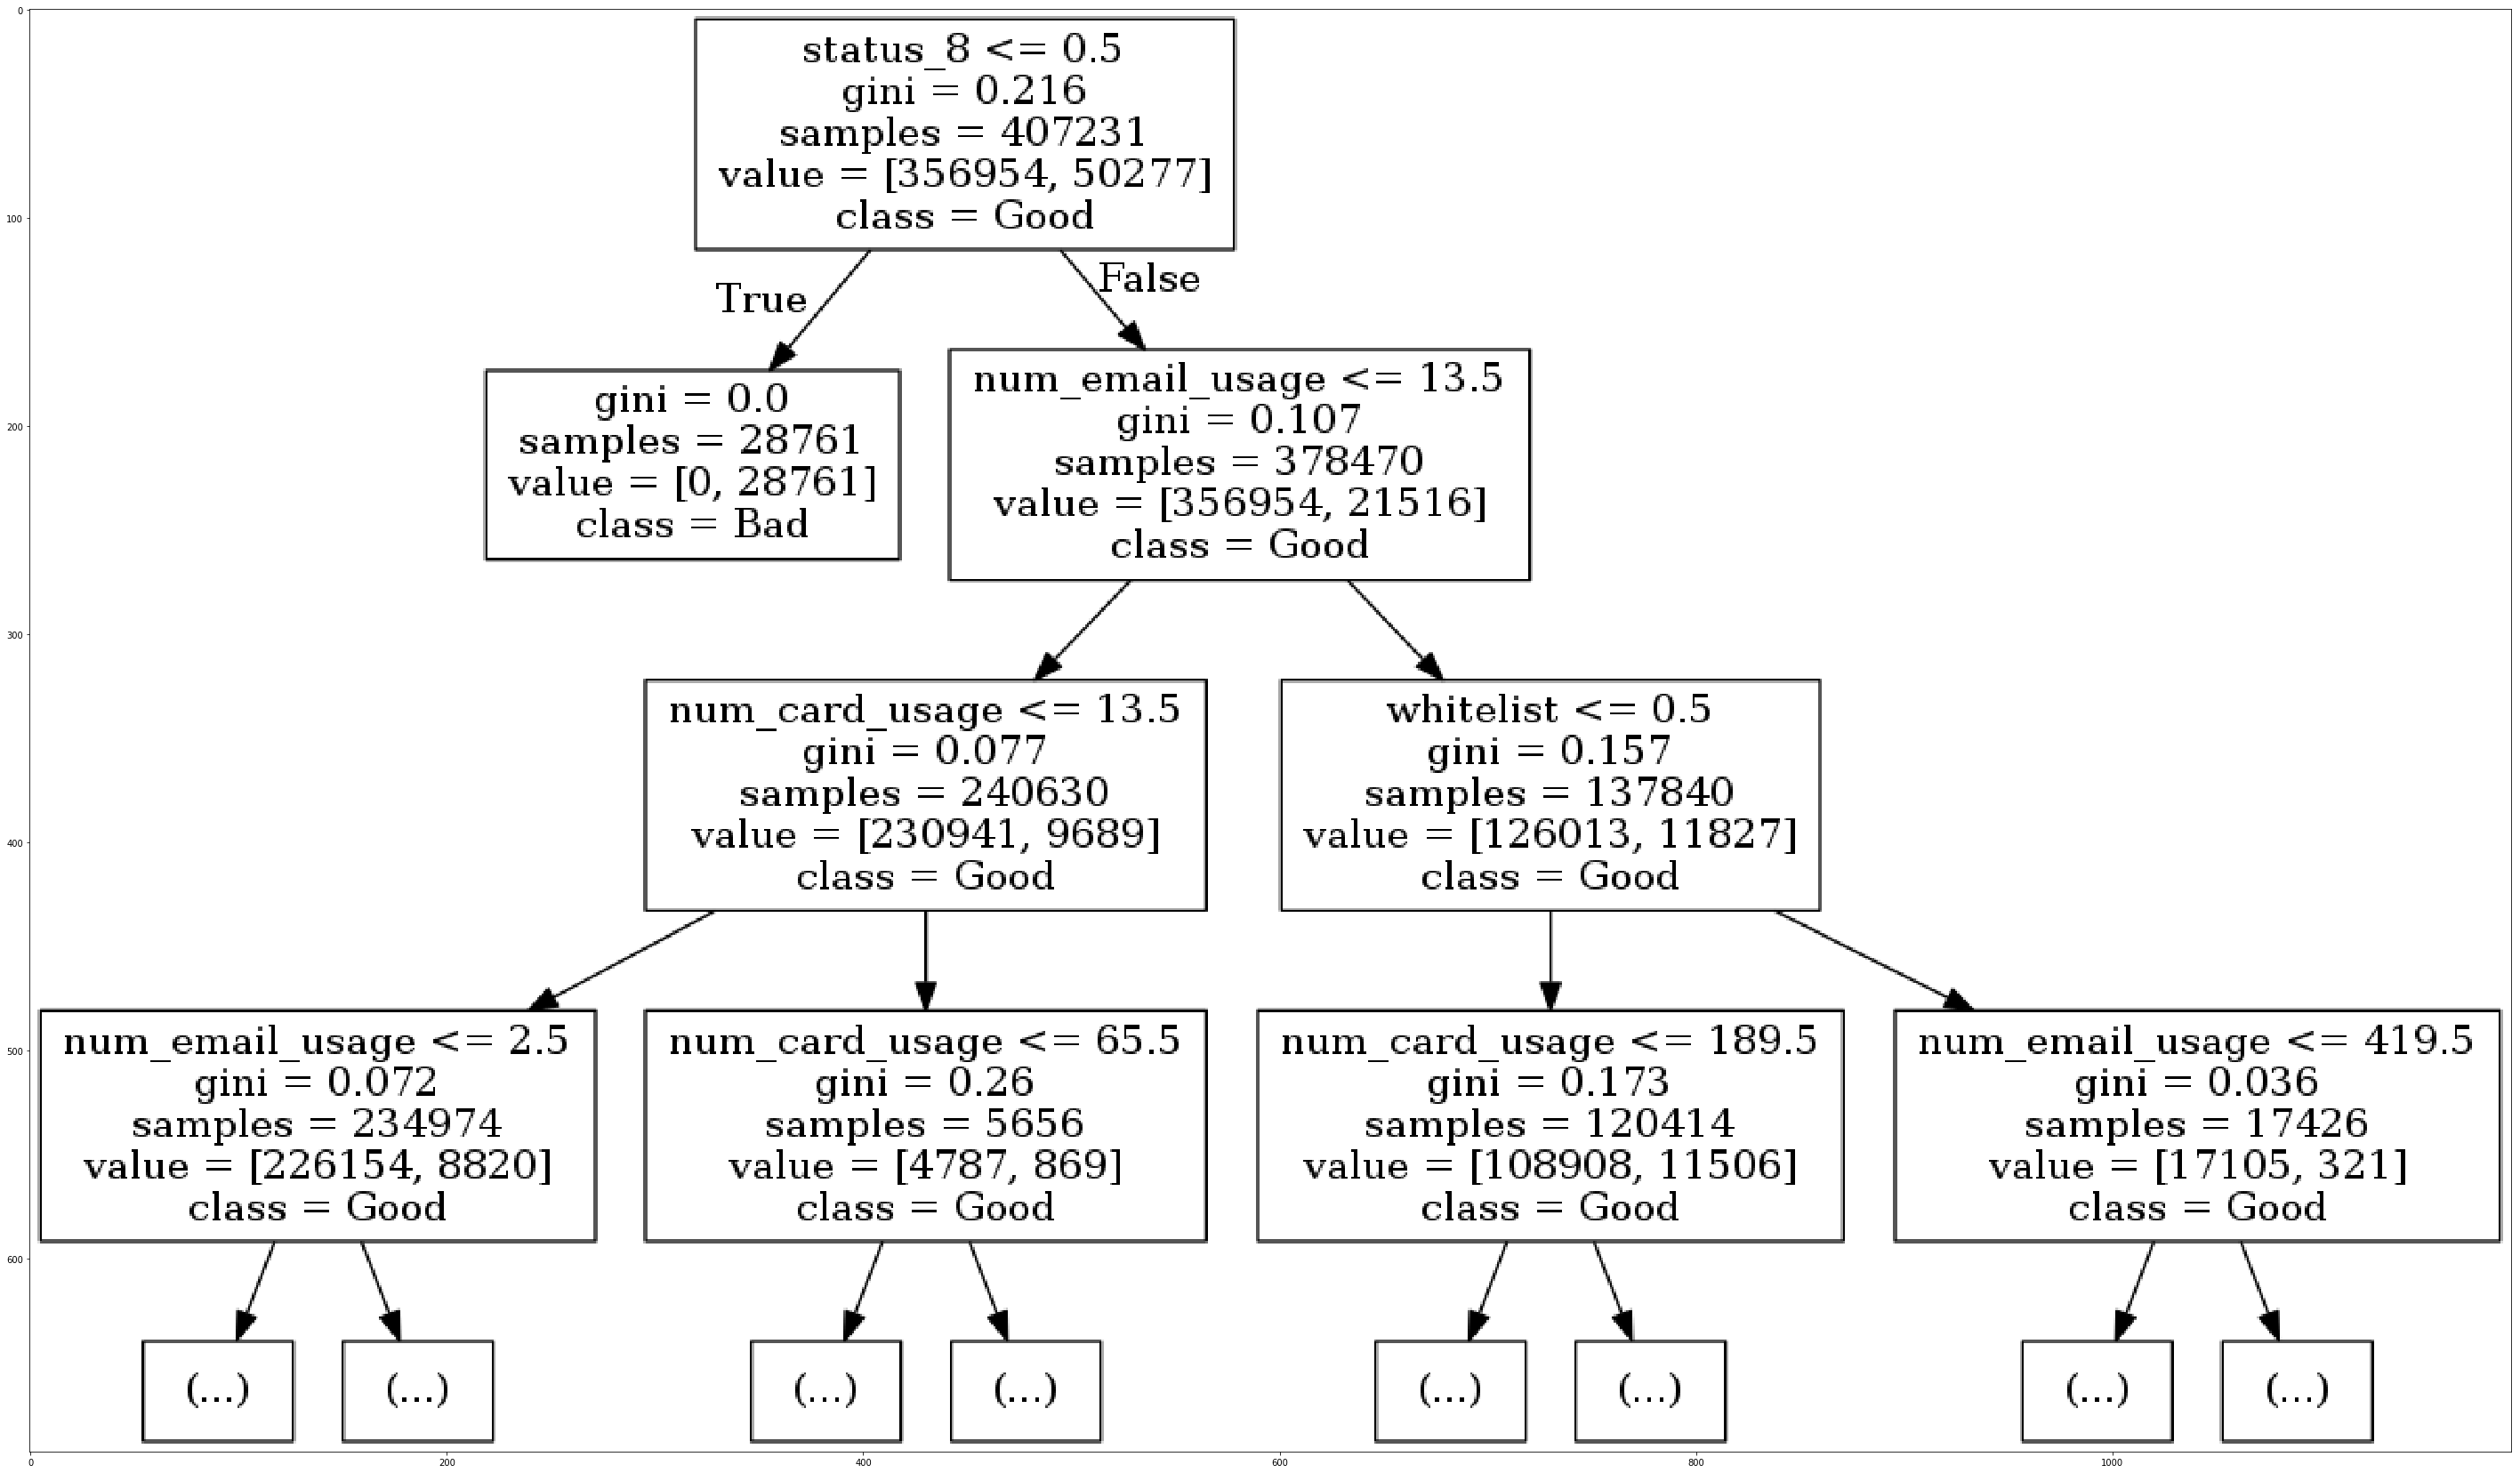

In [84]:
import StringIO
import matplotlib.image as mpimg
from sklearn.tree import export_graphviz
import pydotplus
import tempfile

def show_tree(decisionTree, file_path, feature_names, class_names):
    dotfile = StringIO.StringIO()
    export_graphviz(
        decisionTree, out_file=dotfile, max_depth=3, feature_names=feature_names,
        class_names=class_names
    )
    graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
    graph.write_png(file_path)
    img = mpimg.imread(file_path)
    plt.figure(figsize=(50,50))
    plt.imshow(img)

show_tree(dtc_model, './imgs/dtc_model.png', list(data.columns.values), class_names=['Good', 'Bad'])

## Important features svm

In [85]:
linear_svm_model = svm_model.named_steps['svm']
weights = zip(list(data.columns.values), linear_svm_model.coef_[0])
weights = [(name, abs(val)) for name, val in weights]
weights = sorted(weights, key=lambda x: x[1], reverse=True)

print weights

[('status_8', 0.2556407076503146), ('blacklist', 0.20496672324108497), ('status_12', 0.1412857756546724), ('status_11', 0.13098483782487483), ('status_4', 0.12709730300338648), ('status_6', 0.091251017349975927), ('chargeback', 0.074724374555670214), ('whitelist', 0.073788191773493259), ('num_card_usage', 0.044726038994082638), ('num_email_usage', 0.037125471385464896), ('status_3', 0.019724371736554912), ('num_digits_email', 0.018907173796760629), ('email_length', 0.013407383185792945), ('num_symbols_email', 0.0099880033472351734), ('transaction_hour', 0.0047416301289131164), ('amount', 0.003560634078105954), ('transaction_weekday', 0.0035166502122013161), ('status_5', 0.0), ('status_13', 0.0), ('status_14', 0.0)]


## Limitations
1. Time for parameters validation.
2. Dataset size.
3. Improve class imbalance management.

## Data improvements
1. Include date variable.
2. Use more email and credict card info.
3. Use models that explode variables relation.

## Deployment 
1. Stateless model
2. How to evolve the model?
3. Risk and cost evaluation of false positive and false negative